In [5]:
"""setup"""
import json
from spotifydb import *
from IPython.display import display
import matplotlib.pyplot as plt
import os

In [ ]:
"""Create tables"""

try: os.remove("spotify.db")
except FileNotFoundError: pass
connection = connect("spotify.db")
cursor = connection.cursor()
with open("database.sql", 'r') as f:
    cursor.executescript(f.read())
connection.commit()
connection.close()

In [3]:
"""populate database"""

data_directory = "data/elias"

# from os import listdir
# from os.path import isfile, join
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

connection = connect("spotify.db")
for filename in os.listdir(data_directory):
    with open(f"{os.path.join(data_directory, filename)}", 'r', encoding='utf8') as f:
        streams = json.load(f)
    for stream in streams:
        if not add_song_stream(connection, stream):
            add_episode_stream(connection, stream)
connection.commit()
connection.close()

In [4]:
"""return all songs ranked by times played"""

query = """--sql
    SELECT so.song_name as Song, COUNT(so.url) AS "Times played"
    FROM songs so JOIN song_streams st ON so.url = st.url
    GROUP BY so.song_name ORDER BY "Times played" DESC;
"""
result = run_single_query(query)
display(result)

,Song,Times played
0,Enter Sandman,375
1,Sunflower - Spider-Man: Into the Spider-Verse,326
2,Sultans Of Swing,321
3,Nothing Else Matters,319
4,Master Of Puppets,312
...,...,...
6705,(Both Ears) Head Phone Tapping (Bass),1
6706,(Both Ears) Exfoliating Glove Massage W/ (Ear ...,1
6707,(Anesthesia) Pulling Teeth,1
6708,#Självis,1


In [5]:
"""returns all albums ranked by times played"""
query = """--sql
    SELECT so.album_name as Album, so.artist_name AS Artist, COUNT(LOWER(so.album_name)) AS "Times Played"
    FROM songs so JOIN song_streams st ON so.url = st.url
    GROUP BY LOWER(so.album_name)
    ORDER BY "Times Played" DESC
    LIMIT 40;
"""
result = run_single_query(query)
display(result)

,Album,Artist,Times Played
0,Hard To Imagine The Neighbourhood Ever Changing,The Neighbourhood,2834
1,AM,Arctic Monkeys,1976
2,Wiped Out!,The Neighbourhood,1673
3,Planet Her,Doja Cat,1183
4,Hot Pink,Doja Cat,1040
5,Cry Baby,Melanie Martinez,938
6,Favourite Worst Nightmare,Arctic Monkeys,860
7,Chip Chrome & The Mono-Tones,The Neighbourhood,776
8,Hollywood's Bleeding,Post Malone,770
9,#000000 & #FFFFFF (No DJ Version),The Neighbourhood,709


In [6]:
"""return all songs ranked by times played"""

query = """--sql
    SELECT so.song_name as Song, COUNT(so.url) AS "Times played"
    FROM songs so JOIN song_streams st ON so.url = st.url
    WHERE st.time_stamp >= '2018-01-01 00:00:00'
    GROUP BY so.url, so.song_name ORDER BY "Times played" DESC
    LIMIT 50;
"""
result = run_single_query(query)
display(result)

,Song,Times played
0,MONTERO (Call Me By Your Name),489
1,Cry Baby,443
2,do u even miss me at all?,424
3,505,419
4,Dark Red,401
5,Do I Wanna Know?,387
6,Reflections,377
7,Ain't Shit,337
8,Harvey,330
9,Nervous,323


In [7]:
query = """--sql
    SELECT so.song_name as Song, so.album_name as Album, COUNT(so.song_name) AS "Times played"
    FROM songs so JOIN song_streams st ON so.url = st.url
    WHERE st.time_stamp >= '2024-01-01 00:00:00'
    GROUP BY so.song_name ORDER BY "Times played" DESC
    LIMIT 50;
"""

result = run_single_query(query)
display(result)

,Song,Album,Times played
0,Houdini,Houdini,214
1,Chk Chk Boom,ATE,206
2,Rockstar - Extended,Rockstar,180
3,The Color Violet,Alone At Prom,168
4,SPOT!,SPOT!,165
5,Pink Venom,Pink Venom,161
6,MONTERO (Call Me By Your Name),MONTERO (Call Me By Your Name),157
7,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Idol Episode 4,152
8,That That (prod.&feat. SUGA of BTS),PSY 9th,147
9,CRAZY,CRAZY,147


In [9]:
"""return all songs ranked by minutes played"""
query = """--sql
    SELECT so.artist_name as Artist, Sum(st.ms_listened) / 60000 AS "Minutes listened"
    FROM songs so JOIN song_streams st ON so.url = st.url
 
    GROUP BY so.artist_name ORDER BY "Minutes listened" DESC
    LIMIT 50;
"""
result = run_single_query(query)
display(result)

,Artist,Minutes listened
0,The Neighbourhood,12408
1,Arctic Monkeys,5586
2,(G)I-DLE,3900
3,Melanie Martinez,3482
4,Doja Cat,3421
5,BLACKPINK,2621
6,blackbear,2433
7,BTS,2021
8,TWICE,1952
9,Lil Peep,1778


In [ ]:
query = """--sql
    SELECT Sum(st.ms_listened) / 60000 AS "Minutes"
    FROM song_streams st
    WHERE st.time_stamp >= '2024-01-01 00:00:00';
"""

result = run_single_query(query)
display(result)

,Minutes
0,159549


In [13]:
query = """--sql
    SELECT pe.podcast AS Podcast, Count(pe.podcast) AS "Times Listened"
    FROM podcast_episodes pe JOIN podcast_streams ps ON pe.url = ps.url
    WHERE ps.ms_listened >= 120000
    GROUP BY pe.podcast ORDER BY "Times Listened" DESC;
"""

result = run_single_query(query)
display(result)

,Podcast,Times Listened
0,P3 Dokumentär,112
1,Archived,60
2,P3 Dystopia,53
3,Spotify Dok,30
4,P3 Historia,30
5,Sekter,23
6,Bumbles shows and things,21
7,Vendredi sur Mer - Écoute chérie (sped up),20
8,DStride Beats,19
9,P3 ID,18


In [14]:
query = """--sql
    SELECT pe.podcast AS Podcast, Count(pe.episode) AS "Number of Episodes"
    FROM podcast_episodes pe
    GROUP BY pe.podcast ORDER BY "Number of Episodes" DESC;
"""

result = run_single_query(query)
display(result)

,Podcast,Number of Episodes
0,P3 Dokumentär,86
1,Archived,59
2,P3 Dystopia,37
3,P3 Historia,25
4,Spotify Dok,24
...,...,...
60,Fallen jag aldrig glömmer,1
61,Dark History,1
62,DStride Beats,1
63,Conspiracy Theories,1


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

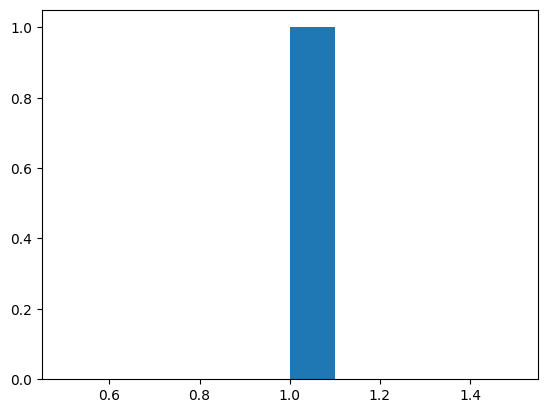

In [18]:


query = """--sql
    SELECT strftime('%m', st.time_stamp) AS "Month of year", SUM(st.ms_listened) 
    FROM song_streams st
    WHERE st.time_stamp >= '2024-01-01 00:00:00'
    ORDER BY "Hour of day";
"""

result = run_single_query(query)
vals = [int(y) for y in result['Month of year']]
plt.hist(vals)